# 0.0 - Imports Libraries

In [1]:
import warnings

import pandas as pd
import numpy  as np

import matplotlib.pyplot as plt

from sklearn              import metrics as mt
from sklearn.linear_model import LogisticRegression

# 1.0 - Load Dataset

In [2]:
# Train Dataset
df_X_train = pd.read_csv( '../dataset/classificacao/X_training.csv' )
y_train = pd.read_csv( '../dataset/classificacao/y_training.csv' )

# Validation Dataset
df_X_val = pd.read_csv( '../dataset/classificacao/X_validation.csv' )
y_val = pd.read_csv( '../dataset/classificacao/y_validation.csv' )

# Test Dataset
df_X_test = pd.read_csv( '../dataset/classificacao/X_test.csv' )
y_test = pd.read_csv( '../dataset/classificacao/y_test.csv' )

# 2.0 - Logistic Regression

## 2.0.1 - Feature Selection

In [4]:
# Selected Features
features = ['customer_type', 'age', 'class', 'flight_distance','inflight_wifi_service', 'departure_arrival_time_convenient',
        'ease_of_online_booking', 'gate_location', 'food_and_drink', 'online_boarding', 'seat_comfort', 
        'inflight_entertainment', 'on_board_service', 'leg_room_service', 'baggage_handling', 'checkin_service', 
        'inflight_service', 'cleanliness', 'departure_delay_in_minutes', 'arrival_delay_in_minutes',
       'gender_Female', 'gender_Male', 'type_of_travel_business_travel', 'type_of_travel_personal_travel']

X_train = df_X_train.loc[:, features]
X_val   = df_X_val.loc[:, features]
X_test = df_X_test.loc[:, features]

Parameter
* C
* solver
* max_iter

In [5]:
warnings.filterwarnings('ignore')

## 2.1 - Performance for Train Dataset

In [6]:
# definition
model = LogisticRegression( random_state=77 )

# fit
model.fit( X_train, y_train )

# predict
yhat_train = model.predict( X_train )

# Performance Metrics
accuracy = mt.accuracy_score( y_train, yhat_train )
precision = mt.precision_score( y_train, yhat_train )
recall = mt.recall_score( y_train, yhat_train )
f1_score = mt.recall_score( y_train, yhat_train )

print( f'A acurácia é: {accuracy:.2%}' )
print( f'A precisão é: {precision:.2%}' )
print( f'Recall: {recall:.2%}' )
print( f'F1 Score: {f1_score:.2%}' )

A acurácia é: 87.52%
A precisão é: 87.07%
Recall: 83.63%
F1 Score: 83.63%


## 2.2. - Performance for Validation Dataset

In [9]:
# definition
model_val = LogisticRegression( random_state=77 )

# training
model_val.fit( X_train, y_train )

# performance
yhat_val = model_val.predict( X_val )

# performance metrics
accuracy_val = mt.accuracy_score( y_val, yhat_val )
precision_val = mt.precision_score( y_val, yhat_val )
recall_val = mt.recall_score( y_val, yhat_val )
f1_score_val = mt.f1_score( y_val, yhat_val )

print( f'A acurácia é: {accuracy_val:.2%}' )
print( f'A precisão é: {precision_val:.2%}' )
print( f'Recall é: {recall_val:.2%}' ) 
print( f'F1 Score: {f1_score_val:.2%}' )

A acurácia é: 87.40%
A precisão é: 86.90%
Recall é: 83.51%
F1 Score: 85.17%


## 2.3 - Hyperparameters Fine Tuning

## C

In [10]:
C = np.arange( 0.1, 2.01, 0.01 )

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [11]:
for i in C:
    # Definition
    model = LogisticRegression( C=i, random_state=77 )

    # Training
    model.fit( X_train, np.ravel(y_train) )

    # Predict
    yhat_val = model.predict( X_val )

    # Performance Metrics
    accuracy = mt.accuracy_score( y_val, yhat_val )
    precision = mt.precision_score( y_val, yhat_val )
    recall = mt.recall_score( y_val, yhat_val )
    f1_score = mt.f1_score( y_val, yhat_val )


    accuracy_list.append( accuracy )
    precision_list.append( precision )
    recall_list.append( recall )
    f1_score_list.append( f1_score)

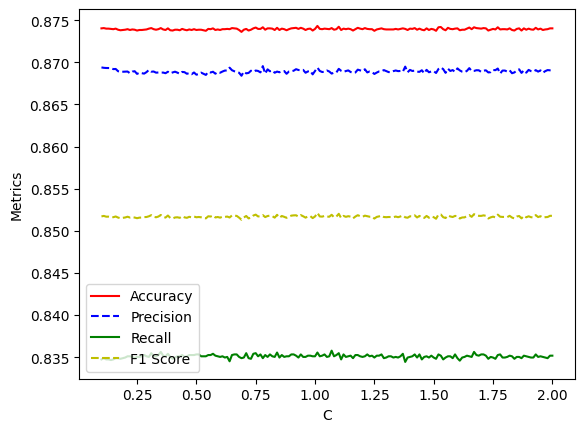

In [12]:
plt.plot(C, accuracy_list, 'r-', label='Accuracy' )
plt.plot(C, precision_list, 'b--', label='Precision' )
plt.plot(C, recall_list, 'g-', label='Recall' )
plt.plot(C, f1_score_list, 'y--', label='F1 Score' )
plt.xlabel( 'C' )
plt.ylabel( 'Metrics' )
plt.legend();

In [13]:
best_C = C[ np.argmax(accuracy_list) ]
best_C

1.0099999999999996

## Solver

In [14]:
solver = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [15]:
for i in solver:
    # Definition
    model_solver = LogisticRegression( solver=i, C=best_C, random_state=77 )

    # Training
    model_solver.fit( X_train, y_train )

    # Predict
    yhat_solver = model_solver.predict( X_val )

    # Performance Metrics
    accuracy = mt.accuracy_score( y_val, yhat_solver )
    precision = mt.precision_score( y_val, yhat_solver )
    recall = mt.recall_score( y_val, yhat_solver )
    f1_score = mt.f1_score( y_val, yhat_solver )

    accuracy_list.append( accuracy )
    precision_list.append( precision )
    recall_list.append( recall )
    f1_score_list.append( f1_score )

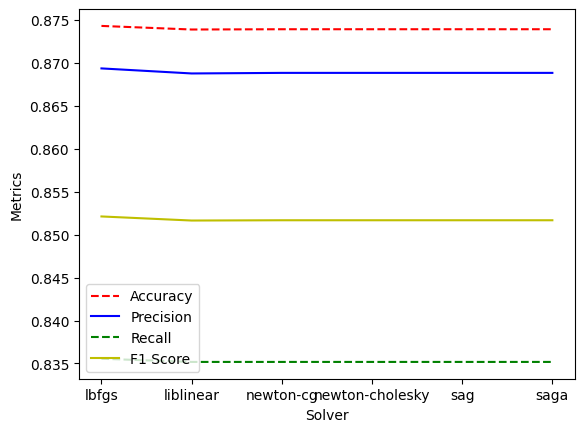

In [16]:
plt.plot( solver, accuracy_list, 'r--', label='Accuracy' )
plt.plot( solver, precision_list, 'b-', label='Precision' )
plt.plot( solver, recall_list, 'g--', label='Recall' )
plt.plot( solver, f1_score_list, 'y-', label='F1 Score' )
plt.xlabel( 'Solver' )
plt.ylabel( 'Metrics' )
plt.legend();

In [17]:
best_solver = solver[ np.argmax(accuracy_list) ]
best_solver

'lbfgs'

## max_iter

In [18]:
max_iter = np.arange( 100, 4000, 100 )

accuracy_list = []
precision_list = []
recall_list = []
f1_score_list = []

In [19]:
for i in max_iter:
    # Definition
    model_max = LogisticRegression( max_iter=i, solver=best_solver, C=best_C, random_state=77 )

    # Training
    model_max.fit( X_train, y_train )

    # Predict
    yhat_max = model_max.predict( X_val )

    # Performance Metrics
    accuracy_max = mt.accuracy_score( y_val, yhat_max )
    precision_max = mt.precision_score( y_val, yhat_max ) 
    recall_max = mt.recall_score( y_val, yhat_max )
    f1_score_max = mt.f1_score( y_val, yhat_max )

    accuracy_list.append( accuracy_max )
    precision_list.append( precision_max )
    recall_list.append( recall_max )
    f1_score_list.append( f1_score_max )

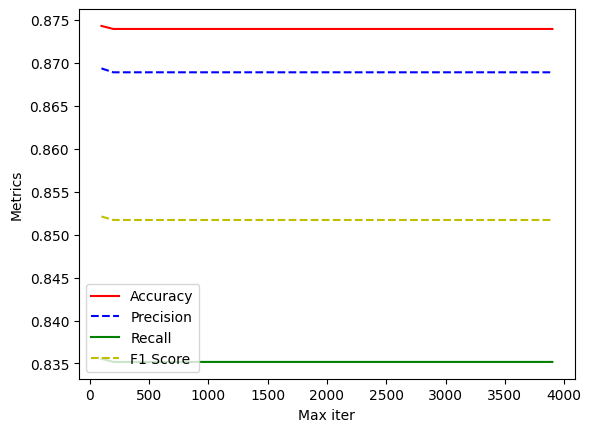

In [20]:
plt.plot(max_iter, accuracy_list, 'r-', label='Accuracy')
plt.plot(max_iter, precision_list, 'b--', label='Precision')
plt.plot(max_iter, recall_list, 'g-', label='Recall')
plt.plot(max_iter, f1_score_list, 'y--', label='F1 Score')
plt.xlabel( 'Max iter' )
plt.ylabel( 'Metrics' )
plt.legend();

In [21]:
best_max_iter = max_iter[np.argmax(accuracy_list)]
best_max_iter

100

## 2.4 - Train Final Model

In [22]:
# Definition 
model_final = LogisticRegression( C=best_C, max_iter=best_max_iter, solver=best_solver, random_state=77 )

# Training
model_final.fit( pd.concat( [X_train, X_val], axis=0 ), pd.concat( [y_train, y_val], axis=0 ) )

# Predict
yhat_test = model_final.predict( X_test )

# Performance Metrics
accuracy_test = mt.accuracy_score( y_test, yhat_test )
precision_test = mt.precision_score( y_test, yhat_test )
recall_test = mt.recall_score( y_test, yhat_test )
f1_score_test = mt.f1_score( y_test, yhat_test )


print( f'A acurácia é: {accuracy_test:.3%}' )
print( f'A precisão é: {precision_test:.3%}' )
print( f'Recall é: {recall_test:.3%}' )
print( f'F1 Score é: {f1_score_test:.3%}' )

A acurácia é: 87.147%
A precisão é: 86.870%
Recall é: 83.308%
F1 Score é: 85.052%
